In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree
import seaborn as sns

In [2]:
# df = pd.read_csv("../0.Datasets/processed/processed_car_data.csv")
df = pd.read_csv("../0.Datasets/processed/sliced_car_data.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [3]:
# here we create new column good_buy or not cause our dataset no feasible for logistic regg
df['good_buy'] = np.where(df['mmr'] > df['sellingprice'], 'No', 'Yes')

In [4]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date,good_buy
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00,No
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00,No
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00,No
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00,No
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00,No


In [5]:
x = df[['condition', 'odometer','mmr', 'sellingprice']]
x

,condition,odometer,mmr,sellingprice
0,19.000000,14538.0,24300.0,7200.0
1,29.000000,25969.0,34200.0,30000.0
2,30.672365,33450.0,20100.0,14700.0
3,49.000000,5826.0,24000.0,23750.0
4,38.000000,10736.0,67000.0,65000.0
5,30.672365,9281.0,15150.0,8500.0
6,42.000000,16506.0,32100.0,32500.0
7,48.000000,12725.0,32300.0,32500.0
8,30.672365,11278.0,50400.0,34000.0
9,42.000000,11874.0,22200.0,19500.0


In [6]:
y = df['good_buy']
y

0      No
1      No
2      No
3      No
4      No
5      No
6     Yes
7     Yes
8      No
9      No
10     No
11     No
12    Yes
13     No
14    Yes
15     No
16    Yes
17     No
18     No
19     No
Name: good_buy, dtype: object

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
tree_classifer = DecisionTreeClassifier()


In [11]:
start = time.time()
tree_classifer.fit(x_train_scaled, y_train)
end = time.time()
print(f"execution time {end - start}")

execution time 0.0020160675048828125


In [12]:
y_predict = tree_classifer.predict(x_test_scaled)
y_predict

array(['No', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [13]:
print(np.array(y_test))

['No' 'No' 'No' 'No' 'No' 'No']


In [14]:
print(accuracy_score(y_test, y_predict))

0.6666666666666666


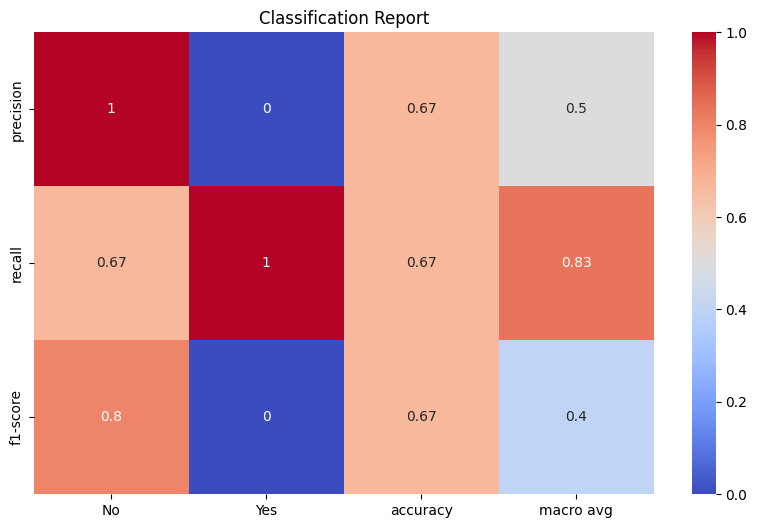

In [18]:
report = classification_report(y_test, y_predict,zero_division=1, output_dict= True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()



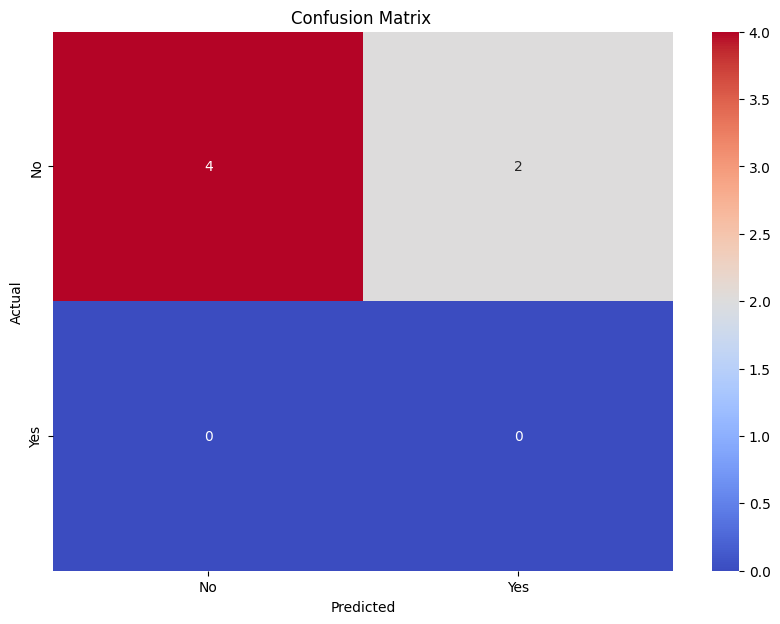

In [24]:

plt.figure(figsize=(10, 7))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, fmt='d', cmap='coolwarm', xticklabels=tree_classifer.classes_, yticklabels=tree_classifer.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()

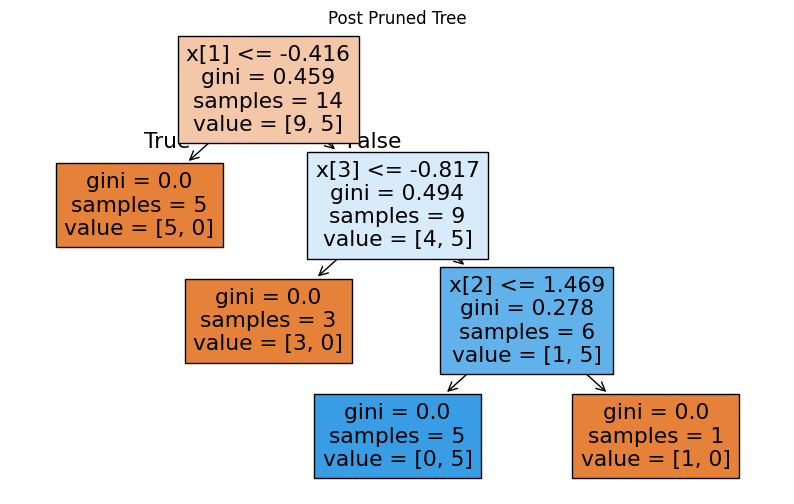

In [25]:
plt.figure(figsize=(10,6))
tree.plot_tree(tree_classifer, filled= True)
plt.savefig('./Graph/1.Post_pruning.png')
plt.title("Post Pruned Tree")
plt.show()

# Prepruning

In [30]:
parameters = {
    'criterion':['gini','entropy', 'log_loss'], 
    'max_depth':[1,2,3,4,5,6,7],
    'splitter':['best', 'random'],
    'max_features':['log2','sqrt'],
}

In [31]:
new_decision_tree_classifier = DecisionTreeClassifier()
cv = GridSearchCV(new_decision_tree_classifier, param_grid= parameters, cv=3, scoring='accuracy')

In [32]:
cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [34]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       splitter='random')

In [35]:
y_predict = cv.predict(x_test_scaled)
y_predict

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [36]:
y_test

0     No
17    No
15    No
1     No
8     No
5     No
Name: good_buy, dtype: object

In [37]:
print(accuracy_score(y_test, y_predict))

0.5


In [38]:
print(classification_report(y_test, y_predict,zero_division=1))

              precision    recall  f1-score   support

          No       1.00      0.50      0.67         6
         Yes       0.00      1.00      0.00         0

    accuracy                           0.50         6
   macro avg       0.50      0.75      0.33         6
weighted avg       1.00      0.50      0.67         6



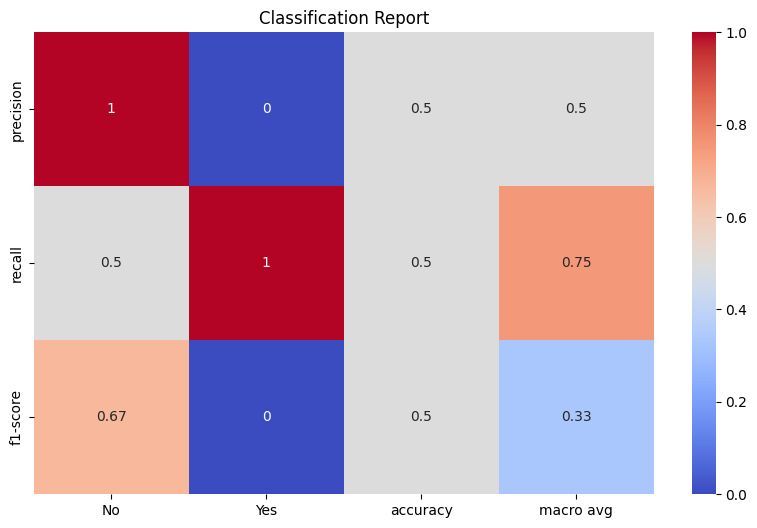

In [39]:
report = classification_report(y_test, y_predict,zero_division=1, output_dict= True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()


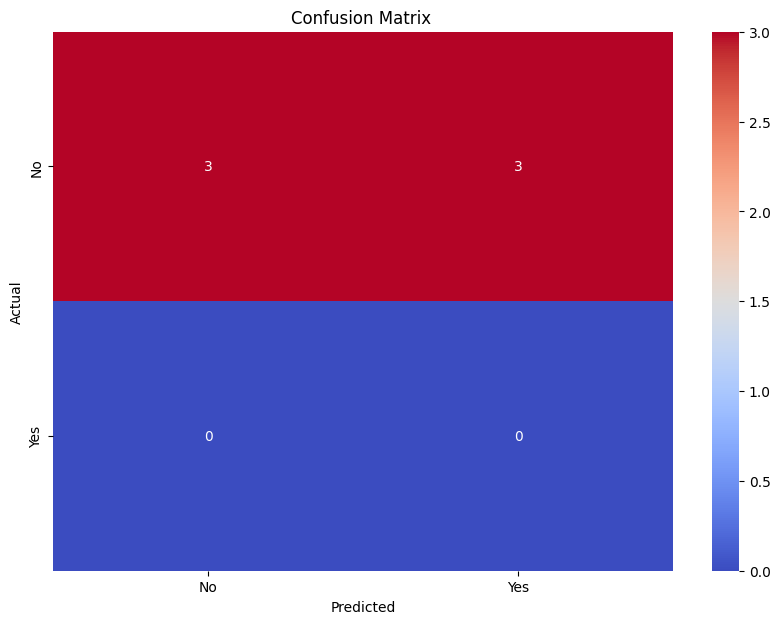

In [40]:

plt.figure(figsize=(10, 7))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, fmt='d', cmap='coolwarm', xticklabels=tree_classifer.classes_, yticklabels=tree_classifer.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()

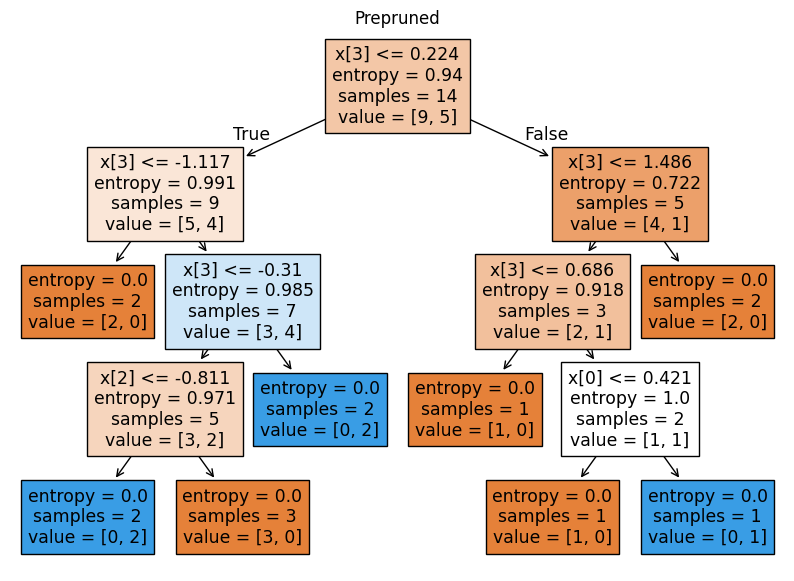

In [43]:
classifier = cv.best_estimator_
plt.figure(figsize=(10,7))
tree.plot_tree(classifier, filled= True)

plt.savefig('./Graph/1.prepruned_tree.png')
plt.title("Prepruned")
plt.show()

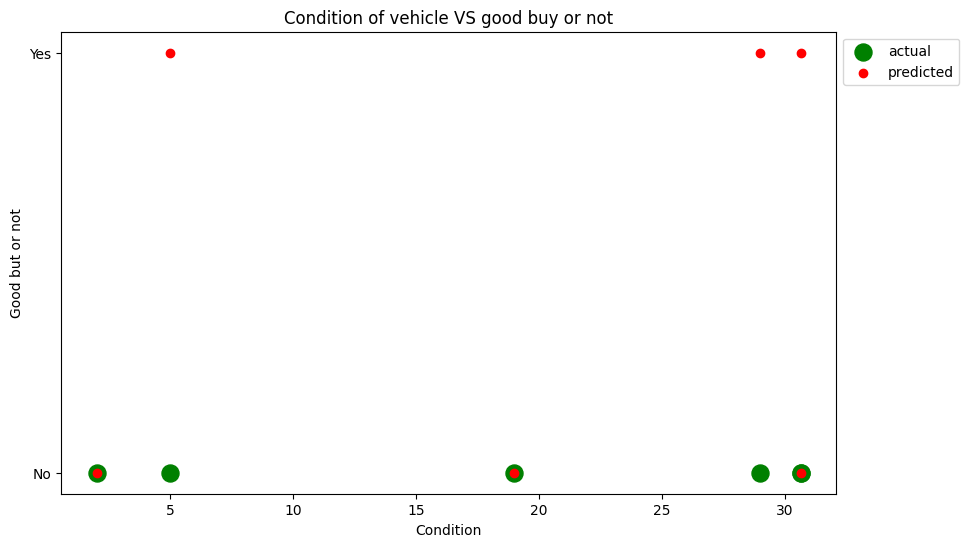

In [46]:
plt.figure(figsize = (10,6))

plt.scatter(x_test['condition'], y_test, label ='actual', color='green', s =150)
plt.scatter(x_test['condition'], y_predict, label= 'predicted', color = 'red')

plt.xlabel('Condition')
plt.ylabel('Good but or not')
plt.title("Condition of vehicle VS good buy or not")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("./Graph/1.good_buy_on_condition.png")
plt.show()